<a href="https://colab.research.google.com/github/Abiti0233/wordcloud/blob/main/%E3%83%AF%E3%83%BC%E3%83%89%E3%82%AF%E3%83%A9%E3%82%A6%E3%83%89%E4%BD%9C%E6%88%90.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
aptitude is already the newest version (0.8.13-3ubuntu1).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.
mecab is already installed at the requested version (0.996-14build9)
libmecab-dev is already installed at the requested version (0.996-14build9)
mecab-ipadic-utf8 is already installed at the requested version (2.7.0-20070801+main-3)
git is already installed at the requested version (1:2.34.1-1ubuntu1.11)
make is already installed at the requested version (4.3-4.1build1)
curl is already installed at the requested version (7.81.0-1ubuntu1.17)
xz-utils is already installed at the requested version (5.2.5-2ubuntu1)
file is already installed at the requested version (1:5.41-3ubuntu0.1)
mecab is already installed at the requested version (0.996-14build9)
libmecab-dev is already installed at the requested version (0.996-14build9)
mecab-ipadic-utf8 is already installed at the re

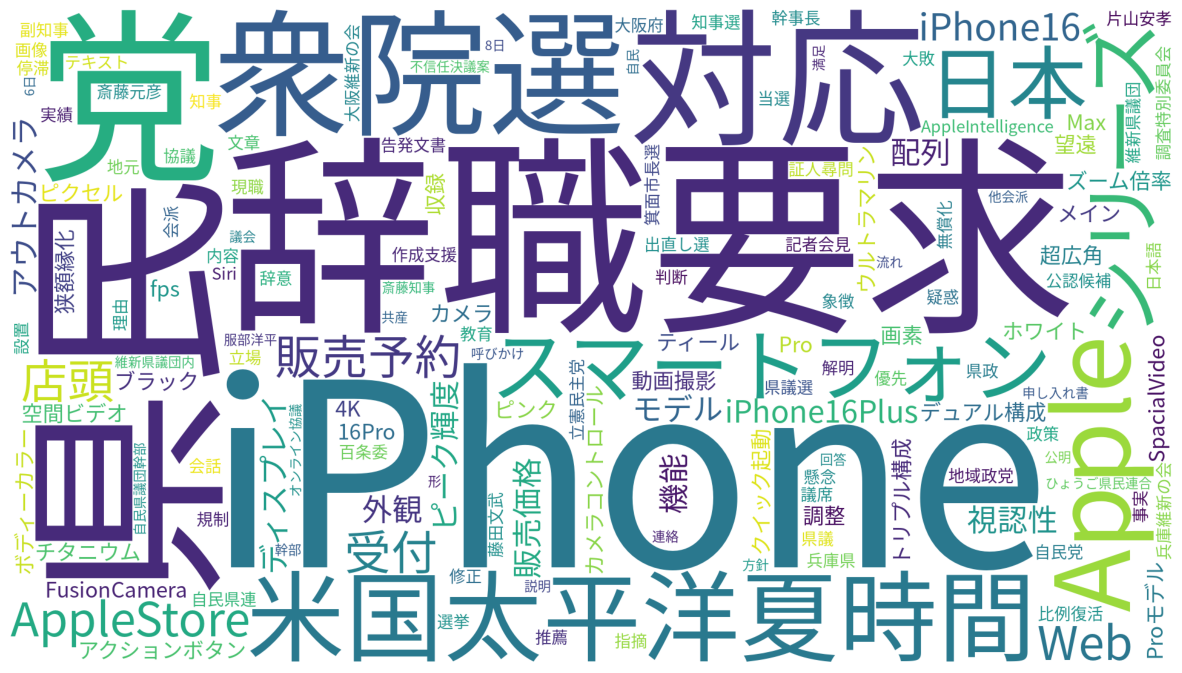

In [ ]:
# stop_wordsの設定（表示しない単語）文章に応じて追加してよし
# 不要な文字を入力→指定した文字は処理されない

stop_words = [ u'てる', u'いる', u'なる', u'れる', u'する', u'ある', u'こと', u'これ', u'さん', u'して', \
u'くれる', u'やる', u'くださる', u'そう', u'せる', u'した', u'思う',u'すぎ',u'ため', \
u'それ', u'ここ', u'である', u'だ', u'', u'て',u'に',u'を',u'は',u'の', u'が', u'と', u'た', u'し', u'で', \
u'ない', u'も', u'な', u'い', u'か', u'ので', u'']

!apt install aptitude
!aptitude install mecab libmecab-dev mecab-ipadic-utf8 git make curl xz-utils file -y
!pip install mecab-python3==0.7

import MeCab # 分かち書きに必要
import re #reは正規表現操作で用いられる

from wordcloud import WordCloud
import matplotlib.pyplot as plt
import codecs

fpath = './NotoSansCJKjp-Regular.otf'

## 解析したい文章を入力
text=('Apple, 米国太平洋夏時間, スマートフォン, iPhone 16, シリーズ, 日本, AppleStore, Web, 店頭, 販売予約, 受付, iPhone16, iPhone16Plus, モデル, ディスプレイ, ピーク輝度, 視認性, 販売価格, 外観, アウトカメラ, 配列, 機能, アクションボタン, カメラ, クイック起動, ズーム倍率, 調整, カメラコントロール, 画素, 超広角, メイン, デュアル構成, FusionCamera, 望遠, 動画撮影, SpacialVideo, 空間ビデオ, 収録, ボディーカラー, ブラック, ホワイト, ピンク, ティール, ウルトラマリン, iPhone 16Pro, iPhone 16 Pro Max, Proモデル, 狭額縁化, トリプル構成, 4K, ピクセル, fps, チタニウム, AppleIntelligence, 文章, 作成支援, 画像, Siri, テキスト, 会話, 日本語, 藤田文武, 幹事長, 記者会見, 兵庫県, 斎藤元彦, 知事, 辞職要求, 理由, 出直し選, 選挙, 県民, 判断, 党, 対応, 県政, 停滞, 指摘, 規制, 教育, 無償化, 政策, 実績, 立場, 象徴, 知事選, 自民党, 推薦, 衆院選, 比例復活, 公認候補, 当選, 県議選, 議席, 会派, 告発文書, 疑惑, 維新県議団, 調査特別委員会, 百条委, 設置, 片山安孝, 副知事, 辞意, 自民県連, 事実, 解明, 優先, 大阪府, 箕面市長選, 地域政党, 大阪維新の会, 現職, 大敗, 衆院選, 懸念, 地元, 兵庫維新の会, 協議, 証人尋問, 内容, 党, 対応, 修正, 立憲民主党, 県議, ひょうご県民連合, 不信任決議案, 他会派, 維新県議団内, 幹部, 6日, 自民, 公明, 共産, 方針, 流れ, 辞職要求, 8日, オンライン協議, 形, 斎藤知事, 説明, 議会, 県民, 満足, 申し入れ書, 服部洋平, 自民県議団幹部, 呼びかけ, 回答, 連絡.')

tagger = MeCab.Tagger("")
tagger.parse(text)
node = tagger.parseToNode(text).next
print(node.surface)
print(node.feature[0])

words = [word.strip() for word in text.split(',')]

wc_text = ' '.join(words)

print(wc_text) # 分かち書き＆品詞の分類の表示

wordcloud = WordCloud(font_path=fpath,
                      background_color="white",
                      width=1920, height=1080,
                      stopwords=set(stop_words)).generate(wc_text)
plt.figure(figsize=(15,12))
plt.imshow(wordcloud)
plt.axis("off")
plt.savefig("word_cloud.png")